# Read

The data of the selected pairs to trade.

In [1]:
import boto3

s3_client = boto3.client('s3')
buckets = s3_client.list_buckets()

print('S3 Buckets:', [bucket['Name'] for bucket in buckets['Buckets']])

S3 Buckets: ['mscfe-capstone-project-bucket', 'sagemaker-studio-406161328814-1saddabruiu', 'sagemaker-studio-406161328814-dzrppwldjct', 'sagemaker-studio-406161328814-xd0fcbja55', 'sagemaker-us-east-1-406161328814']


In [2]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import models
import numpy as np
import pandas as pd
import strategy

from data import *

Matplotlib is building the font cache; this may take a moment.
2025-02-09 13:57:15.420075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739109435.450318   13448 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739109435.471209   13448 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 13:57:15.521432: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/s

In [9]:
from io import StringIO

# # Define S3 bucket and file path
# bucket_name = 'mscfe-capstone-project-bucket'
# file_key = 'filtered_data.csv'

# # Initialize S3 client
# s3 = boto3.client('s3')

# # Read the CSV file from S3
# obj = s3.get_object(Bucket=bucket_name, Key=file_key)
# filtered = pd.read_csv(StringIO(obj['Body'].read().decode('utf-8'))).drop(['Unnamed: 0'], axis=1)
filtered = pd.read_csv('filtered_data.csv').drop(['Unnamed: 0'], axis=1)

display(filtered)

,seriesX,seriesY,correlation,spread_adf_stat,spread_adf_pValue,spread_stationary,series_coint_stat,series_coint_pValue,series_cointegrated
0,GOOG,GOOGL,0.999931,-4.971937,0.000025,True,-4.976339,0.000182,True
1,META,DAXEX_ETF,0.888934,-2.917056,0.043400,True,-3.483091,0.033924,True
2,AMZN,BNBUSDT,0.877059,-3.631203,0.005192,True,-3.545100,0.028601,True
3,AMZN,TRXUSDT,0.814577,-3.869803,0.002269,True,-3.387413,0.043768,True
4,SPY_ETF,AVAXUSDT,0.847292,-3.309927,0.014441,True,-3.698512,0.018406,True
5,SPY_ETF,ETHUSDT,0.862483,-3.428205,0.010034,True,-3.737367,0.016394,True
6,EQQQ_ETF,BNBUSDT,0.886060,-3.816404,0.002744,True,-3.670509,0.019987,True
7,BNBUSDT,ADAUSDT,0.901459,-3.279504,0.015820,True,-3.775562,0.014607,True
8,BNBUSDT,BTCUSDT,0.884604,-2.909961,0.044202,True,-3.393160,0.043116,True
9,BNBUSDT,TRXUSDT,0.933562,-3.656380,0.004770,True,-4.003675,0.007095,True


We have the following pairs to trade:
- GOOG and GOOGL: Google Series A and Google Series C - since both securities depict the performance of the same company, we do not want to consider this pair in our portfolio
- META and DAX ETF
- AMZN and BNBUSDT: Amazon and Binance Coin
- AMZN and TRXUSDT: Amazon and TRON cryptocurrency
- S&P 500 ETF and AVAXUDST: S&P 500 ETF and Avalanche cryptocurrency
- S&P 500 ETF and ETHUDST: S&P 500 ETF and Ethereum cryptocurrency
- EQQQ ETF and BNBUSDT: Nasdaq 100 ETF and Binance coin cryptocurrency
- BNBUSDT and ADAUSDT: Binance Coin and Cardano cryptocurrency
- BNBUSDT and BTCUDST: Binance Coin and Bitcoin
- BNBUSDT and TRXUDST: Binance Coin and TRON cryptocurrency
- BNBUSDT and XRPUDST: Binance Coin and XRP (Ripple) cryptocurrency.

As we can see, the portfolio is composed mostly of cryptocurrencies, but there is also an equity pair (Meta/DAX ETF) as well as equity-cryptocurrency pairs: S&P 500 ETF/Avalanche and S&P 500 ETF/Ethereum. Such a composition, in hindsight, should not come as a surprise because:
- **Cryptocurrency pairs** are driven by similar factors and in this market events on all tradeable coins are still mostly driven by Bitcoin, hence high correlations and time-invariant spreads are fairly expected
- **Equity-cryptocurrency pairs**: S&P 500 ETF against Avalanche and Ethereum reflect the increasing interest in and integration of the traditional financial markets and digital assets, while Amazon against Binance coin and TRON may capture the relationship between large-cap technology firms and the broader crypto ecosystem - AWS is widely used in the blockchain infrastructure and Binance Coin is tied to one of the largest cryptocurrency exchanges
- The **equity-equity pair** Meta/DAX ETF suggests a potential macroeconomic link: Meta is a global tech giant while DAX represents the broader European market; hence these two correlating may be drien by similar trends and/or risk sentiments.

In [10]:
print('********************')
pairs = filtered['seriesX'].iloc[1:] + ' ' + filtered['seriesY'].iloc[1:]
print('Trading pairs:')
for p in pairs:
    print(p)
print('********************')

unique_tickers = pd.concat([filtered['seriesX'].iloc[1:], filtered['seriesY'].iloc[1:]]).drop_duplicates()
print('Unique tickers:')
for ut in unique_tickers:
    print(ut)
print('********************')

# Preview the source data
file_key = 'df_full.csv'
# df_full = pd.read_csv('df_full.csv').drop(['Unnamed: 0'], axis=1)
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
df_full = pd.read_csv(StringIO(obj['Body'].read().decode('utf-8'))).drop(['Unnamed: 0'], axis=1)
display(df_full.sample(5))

********************
Trading pairs:
META DAXEX_ETF
AMZN BNBUSDT
AMZN TRXUSDT
SPY_ETF AVAXUSDT
SPY_ETF ETHUSDT
EQQQ_ETF BNBUSDT
BNBUSDT ADAUSDT
BNBUSDT BTCUSDT
BNBUSDT TRXUSDT
BNBUSDT XRPUSDT
********************
Unique tickers:
META
AMZN
SPY_ETF
EQQQ_ETF
BNBUSDT
DAXEX_ETF
TRXUSDT
AVAXUSDT
ETHUSDT
ADAUSDT
BTCUSDT
XRPUSDT
********************


,OpenTime,Open,High,Low,Close,Symbol
44758,2024-12-05 07:00:00,74.3700,74.3700,74.3600,74.3700,CAC40_ETF
241488,2024-11-29 07:35:00,0.9989,0.9990,0.9989,0.9989,USDCUSDT
164080,2024-11-02 10:35:00,0.3518,0.3526,0.3518,0.3525,ADAUSDT
48919,2024-12-10 12:55:00,41242.0000,41242.0000,41242.0000,41242.0000,EQQQ_ETF
150253,2024-10-28 15:20:00,69936.0000,69936.0000,69838.0000,69855.0100,BTCUSDT


## Prepare Spreads of the Final Pairs

Once we have the pairs series prepared and aligned in time, we can proceed with spread calculation. Spread between two assets at time $t$ is given directly as the difference between two asset prices, i.e., $$\text{Spread}_{AB, t} = p_{A,t} - p_{B, t}$$ where $p_A$ - price of asset A and $p_B$ - price of asset B.

The next step is to normalize the spread by subtracting the mean and dividing by standard deviation, given as $$\text{Normalized Spread}_t = \frac{\text{Spread}_{AB, t} - \mu_{\text{Spread}_{AB}}}{\sigma_{\text{Spread}_{AB}}}$$

In the base case scenario, a **trading signal** is identified when spread is below -2 or above 2 with the following interpretation:
- $\text{Spread}_{AB, t} < -2$: buy A, sell B
- $\text{Spread}_{AB, t} > 2$: buy B, sell A.

## Additional Considerations

Our trading strategy will work flawlessly if there is always a sequence of events:
1. *Signal* Buy 1 unit of asset A, sell 1 unit of asset B.
2. No action for $n$ periods.
3. *Signal* Sell 1 unit of asset A, buy 1 unit of asset B.

However, in reality, we cannot assume that such a scenario will always occur. Below we have listed some exceptions and how we have handled them:
- A sequence of consecutive trading signals in the next $k$ forecasts: due to the assumption of next-period-opening-price execution (we are unable to open a position at the same tick that feeds the forecast), we must consider the scenario in which we receive more than one trading signal in a row and how we manage the positions. The possibilities are as follows:
    - *First signal entry*: immediate reaction resulting in increasing our exposure on assets A and B until the exposure limit has been reached, which we discuss in the next point; ensures timely reaction to the forecast, but may lead to unnecessarily frequent trades and transaction costs;
    - *Last signal entry*: waiting until the sequence of trading signals is interrupted by a 'No action' forecast; reduces information noise but may execute trades at less favorable prices;
    - *Threshold-based confirmation*: entering a trade only after receiving $m$ trading subsequent signals, e.g., $m=3$; similarly to last signal entry, it helps avoid information noise, but may lead to less favorable execution; this approach 
- Risk management with respect to portfolio asset allocation: having up to 10 unique assets (assuming all trading pairs have generated signals within the same time frame), we must take certain measures to ensure diversification and avoid overexposure to a single asset by assuming that we limit the exposure to any single asset to **25%** of the total portfolio value.
- Trending spread instead of mean reversion: we can forcefully close the position if the spread does not generate an opposite trading signal within $X$ periods
- Conflicting trading signals: it is possible that while on the pair A-B there is a long/short signal, on the pair A-C there is a short/long signal and the position on A would net to 0. Such a situation can be observed in the Forex market and we are allowing it in this project.

# Benchmark Portfolio

Before we train the models of interest, we must first create a baseline portfolio. We have decided to use a simple buy-and-hold strategy, as frequently seen in academic literature and in the practitioners' approaches.

The benchmark buy and hold portfolio is composed of the equally weighted unique instruments, as listed above:
- META
- AMZN
- SPY_ETF
- EQQQ_ETF
- BNBUSDT
- DAXEX_ETF
- TRXUSDT
- AVAXUSDT
- ETHUSDT
- ADAUSDT
- BTCUSDT
- XRPUSDT.

Therefore, the portfolio return is given as $r_{BP} = \frac{1}{n}\sum_{i=1}^{n}r_i$ with $r_i = \frac{P_{T,i}-P_{1,i}}{P_{1,i}}$ – $i^{th}$ asset discrete return and $P_{t,i}$ – price of asset $i$ at time $t$, $n=12$ assets in the benchmark portfolio.

In [6]:
asset_returns = []

# Calculate each asset's return
for ticker in unique_tickers:
    sub_df = df_full[df_full['Symbol']==ticker].sort_values(by='OpenTime')['Close'].copy()
    p1 = sub_df.iloc[0]
    pT = sub_df.iloc[-1]    
    r_i = (pT-p1)/p1*100
    asset_returns.append({'Symbol': ticker, 'P1': p1, 'PT': pT, 'Return':r_i})

benchmark_return = pd.DataFrame(asset_returns)
display(benchmark_return)
average_return = benchmark_return['Return'].mean()

# Annualize the return
number_of_days = (pd.to_datetime(df_full['OpenTime'].max())
                  - pd.to_datetime(df_full['OpenTime'].min())).days
annualized_return = (1+average_return/100)**(365/number_of_days) - 1

print(f'Benchmark buy-and-hold portfolio return: {round(average_return, 4)}%')
print(f'Annualized return: {round(annualized_return*100, 4)}%')

,Symbol,P1,PT,Return
0,META,593.1400,612.7700,3.309505
1,SPY_ETF,581.8000,597.4900,2.696803
2,EQQQ_ETF,37990.0000,42967.0000,13.100816
3,BNBUSDT,556.3000,697.9800,25.468273
4,TRXUSDT,0.1566,0.2524,61.174968
5,DAXEX_ETF,162.5000,174.0200,7.089231
6,AVAXUSDT,26.3200,39.0400,48.328267
7,ETHUSDT,2420.2100,3379.6100,39.641188
8,ADAUSDT,0.3521,0.9860,180.034081
9,XRPUSDT,0.5334,2.2691,325.403075


Benchmark buy-and-hold portfolio return: 70.6246%
Annualized return: 518.7912%


The benchmark buy-and-hold portfolio in the training period from 04/10/2024 to 20/01/2025 (108 days) generates a return of 70.6246%. After annualizing we get a whopping return of 591.5384%. Such an outstanding portfolio performance is mostly attributed to the cryptocurrency components of our portfolio: BTCUSDT gained 64.41%, ADAUSDT gained 186.68% and XRPUSDT gained 482.17% over the training period However, it is crucial to remember that cryptocurrencies are highly volatile and while in some periods they can generate incredibly high returns, in other periods they can generate even higher losses. In the training period the most important reason for the price increases was the U. S. presidential election: a win by Donal Trump was welcomed enthusiastially in the markets (both cryptocurrency and conventional). Therefore, annualizing cryptocurrency returns bears high risk.

# Model Training

Each pair has its own model trained. First, the models are trained with default hyperparameters. As a next step, we will tune some of them. Given the fact that the objective of this project is not to explore models as such, but finding the optimal model for long/short pair trading portfolio, we shall not focus on all of the hyperparameters, especially for neural networks, known for the multitude of possibly tuneable parameters.

Additionally, we apply the standard 80:20 training-validation split, i.e., the first 80% of the full training set is used for training and the last 20% for validation and later for hyperparameter tuning. The timeline of the train-validation split is then: 04/10/2024 – 30/12/2024 – training set and 30/12/2024 – 20/01/2025 – validation set.

<u>**NOTE**</u> Currently the models add 5 lags of normalized spread to have some features for modeling.

,META,DAXEX_ETF,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-28 12:30:00,580.450,162.10,418.350,-0.524746,No action
2024-10-28 12:35:00,577.670,162.10,415.570,-0.671628,No action
2024-10-28 13:00:00,577.755,162.04,415.715,-0.663967,No action
2024-10-28 13:10:00,577.320,162.08,415.240,-0.689064,No action
2024-10-28 13:20:00,576.615,162.12,414.495,-0.728426,No action


Ridge Regression MSE: 0.01782673148316423
XGBoost MSE: 0.019349448864296064
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
LSTM MSE: 0.043208754144600355
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
RNN MSE: 0.03674176962771921
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
Transformer MSE: 0.0429929593443286


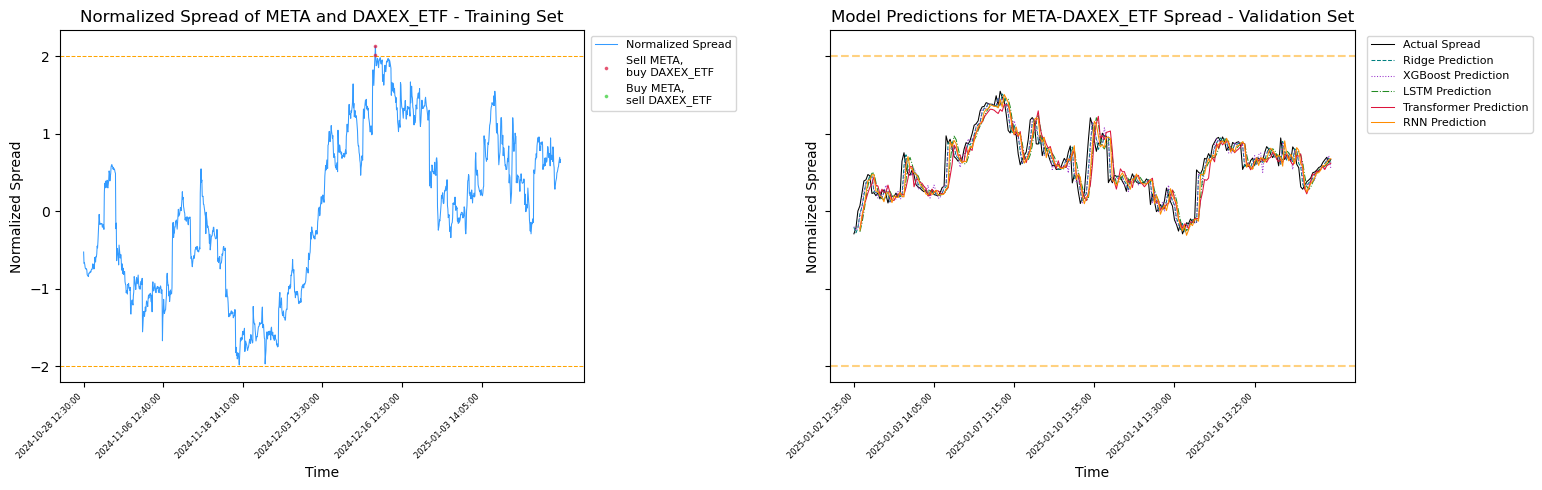

,SPY_ETF,AVAXUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-14 12:30:00,581.80,29.17,552.63,-0.555976,No action
2024-10-14 12:35:00,581.86,29.17,552.69,-0.544138,No action
2024-10-14 12:40:00,582.14,29.20,552.94,-0.494814,No action
2024-10-14 12:45:00,583.03,29.15,553.88,-0.309355,No action
2024-10-14 12:50:00,582.76,29.17,553.59,-0.366571,No action


Ridge Regression MSE: 0.024691441210214774
XGBoost MSE: 0.035931126521194214
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
LSTM MSE: 0.046700561668270975
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
RNN MSE: 0.045943943553373535
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
Transformer MSE: 0.08801743491070642


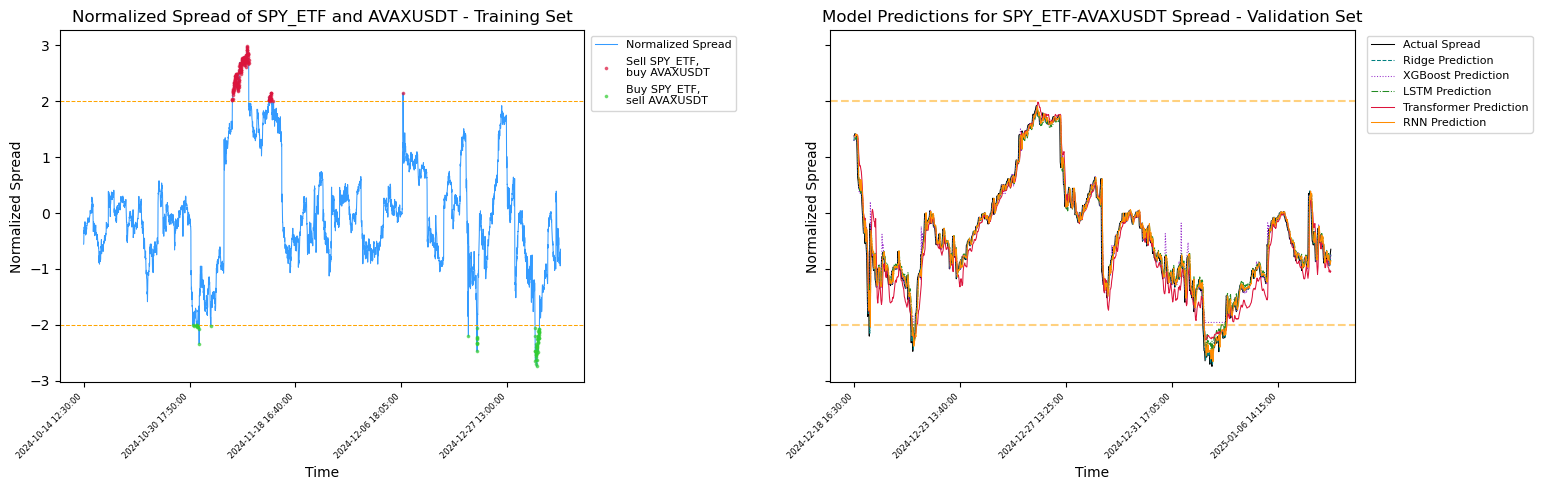

,SPY_ETF,ETHUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-14 12:30:00,581.80,2627.09,-2045.29,1.177548,No action
2024-10-14 12:35:00,581.86,2625.69,-2043.83,1.180623,No action
2024-10-14 12:40:00,582.14,2626.97,-2044.83,1.178517,No action
2024-10-14 12:45:00,583.03,2625.72,-2042.69,1.183023,No action
2024-10-14 12:50:00,582.76,2623.80,-2041.04,1.186497,No action


Ridge Regression MSE: 0.0015243079386767632
XGBoost MSE: 0.002601620696446151
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
LSTM MSE: 0.003323565926303124
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
RNN MSE: 0.0029750257667803376
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Transformer MSE: 0.007171594671952305


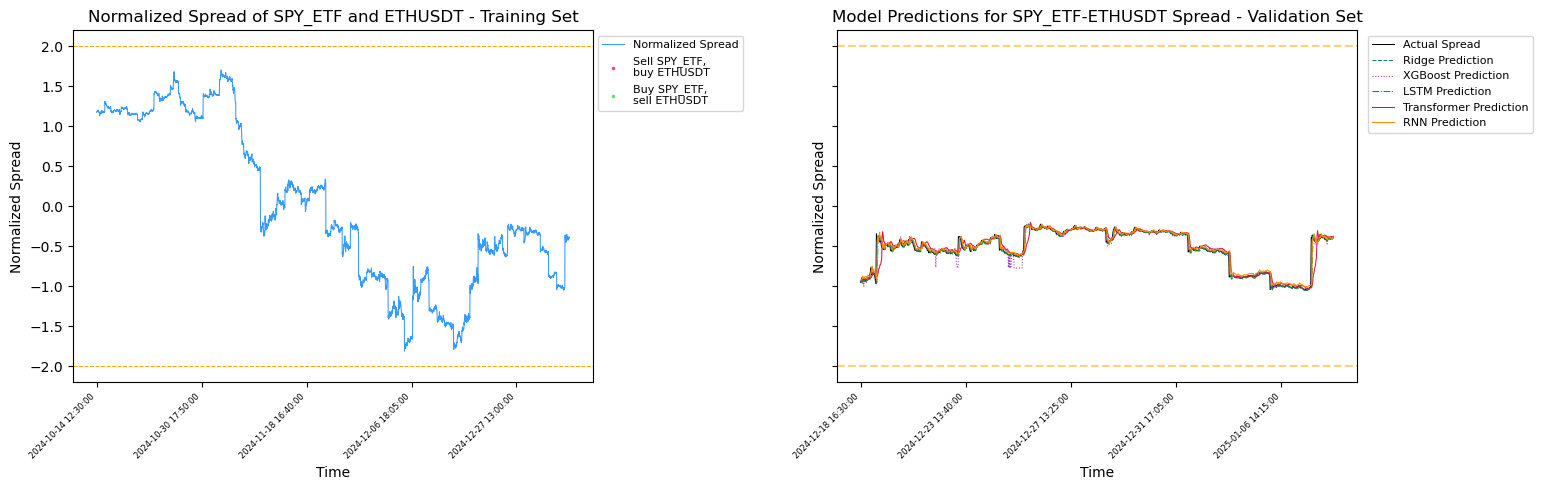

,EQQQ_ETF,BNBUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-31 07:00:00,37990.0,578.2,37411.8,-2.248889,"Buy EQQQ_ETF, sell BNBUSDT"
2024-10-31 07:05:00,38001.0,580.1,37420.9,-2.241156,"Buy EQQQ_ETF, sell BNBUSDT"
2024-10-31 07:10:00,37986.0,579.0,37407.0,-2.252968,"Buy EQQQ_ETF, sell BNBUSDT"
2024-10-31 07:25:00,38011.0,579.6,37431.4,-2.232233,"Buy EQQQ_ETF, sell BNBUSDT"
2024-10-31 07:35:00,37978.0,577.9,37400.1,-2.258832,"Buy EQQQ_ETF, sell BNBUSDT"


Ridge Regression MSE: 0.0021076392674876272
XGBoost MSE: 0.0032421406425171234
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
LSTM MSE: 0.005528609652902304
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RNN MSE: 0.005943376451056313
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
Transformer MSE: 0.009007995729918025


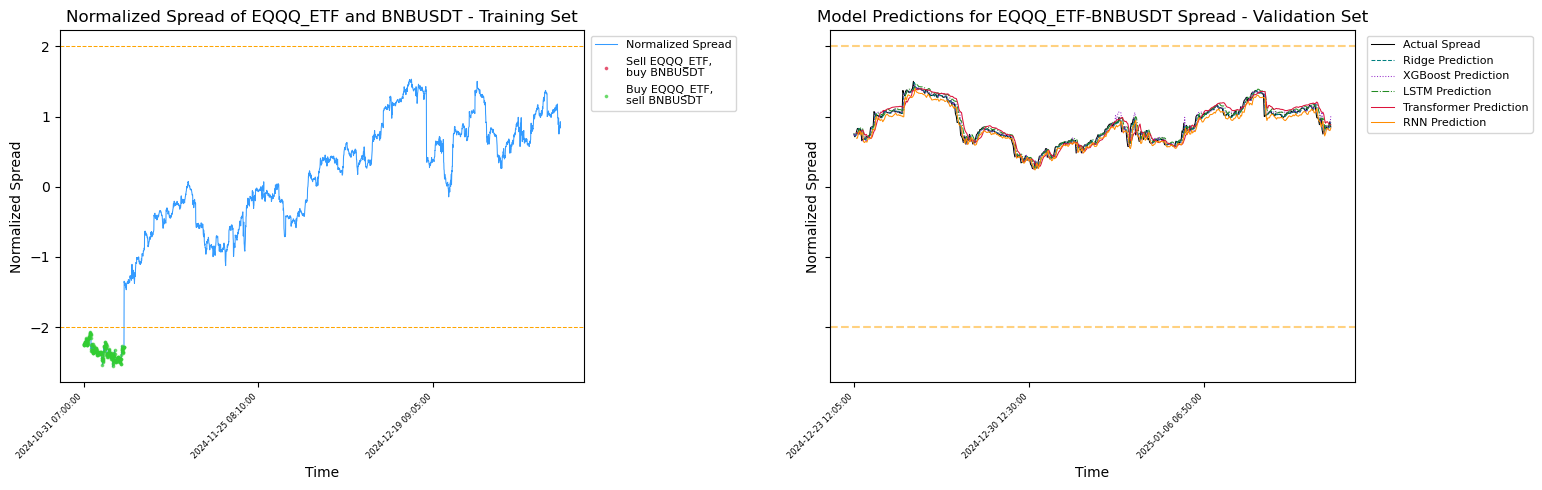

,BNBUSDT,ADAUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-04 16:00:00,556.3,0.3521,555.9479,-1.520989,No action
2024-10-04 16:05:00,556.5,0.3523,556.1477,-1.517447,No action
2024-10-04 16:10:00,556.0,0.3523,555.6477,-1.526310,No action
2024-10-04 16:15:00,555.9,0.3523,555.5477,-1.528082,No action
2024-10-04 16:20:00,555.5,0.3515,555.1485,-1.535158,No action


Ridge Regression MSE: 0.0004037783592016765
XGBoost MSE: 0.0005526897094987268
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
LSTM MSE: 0.0009304079232783349
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
RNN MSE: 0.0008222836122456695
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
Transformer MSE: 0.0016245369646077582


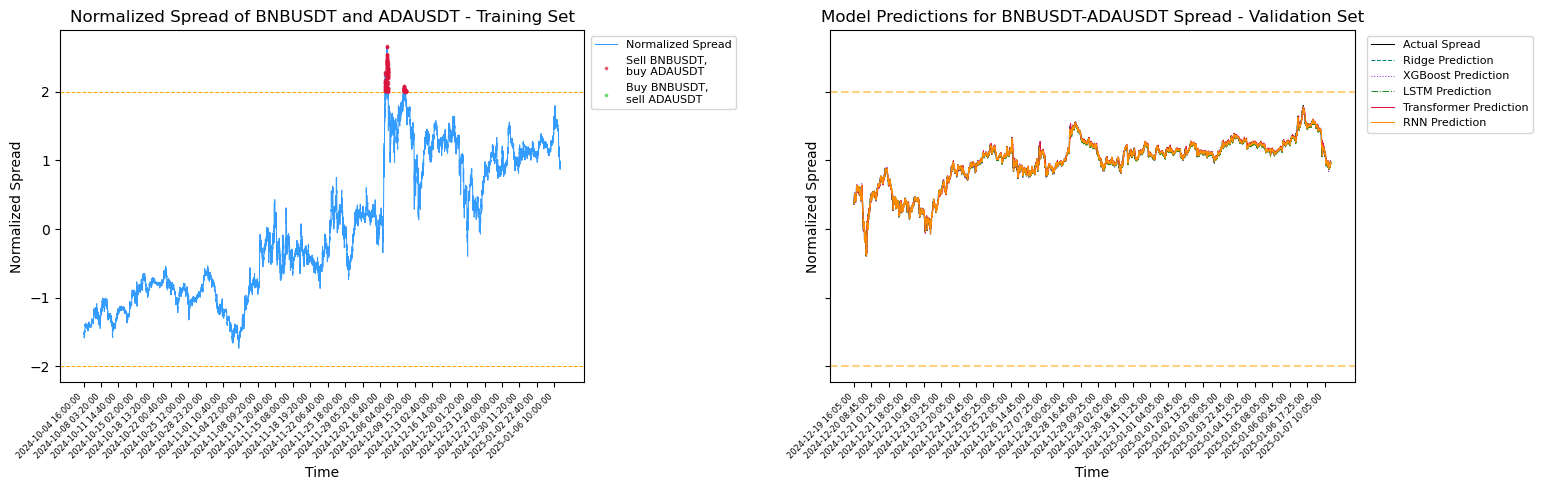

,BNBUSDT,ETHUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-04 16:00:00,556.3,2420.21,-1863.91,1.397404,No action
2024-10-04 16:05:00,556.5,2420.40,-1863.90,1.397426,No action
2024-10-04 16:10:00,556.0,2415.90,-1859.90,1.406057,No action
2024-10-04 16:15:00,555.9,2414.47,-1858.57,1.408927,No action
2024-10-04 16:20:00,555.5,2413.27,-1857.77,1.410653,No action


Ridge Regression MSE: 0.00016334845785126483
XGBoost MSE: 0.0002246615974853407
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step   
LSTM MSE: 0.00036960154415712615
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
RNN MSE: 0.0003664649943964379
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
Transformer MSE: 0.0018693313962947662


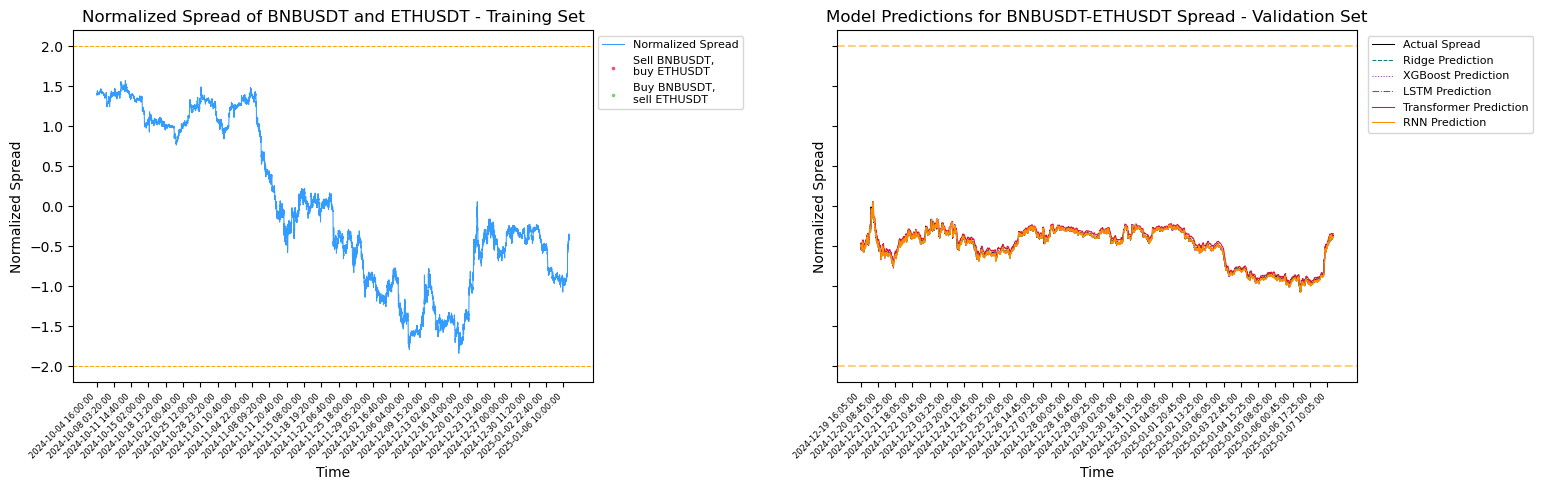

,BNBUSDT,TRXUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-04 16:00:00,556.3,0.1566,556.1434,-1.520241,No action
2024-10-04 16:05:00,556.5,0.1566,556.3434,-1.516711,No action
2024-10-04 16:10:00,556.0,0.1566,555.8434,-1.525537,No action
2024-10-04 16:15:00,555.9,0.1564,555.7436,-1.527298,No action
2024-10-04 16:20:00,555.5,0.1564,555.3436,-1.534358,No action


Ridge Regression MSE: 0.00040173192954986287
XGBoost MSE: 0.0005526011882941155
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
LSTM MSE: 0.0008311937122394714
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
RNN MSE: 0.0009046877022070114
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step   
Transformer MSE: 0.004182432856722906


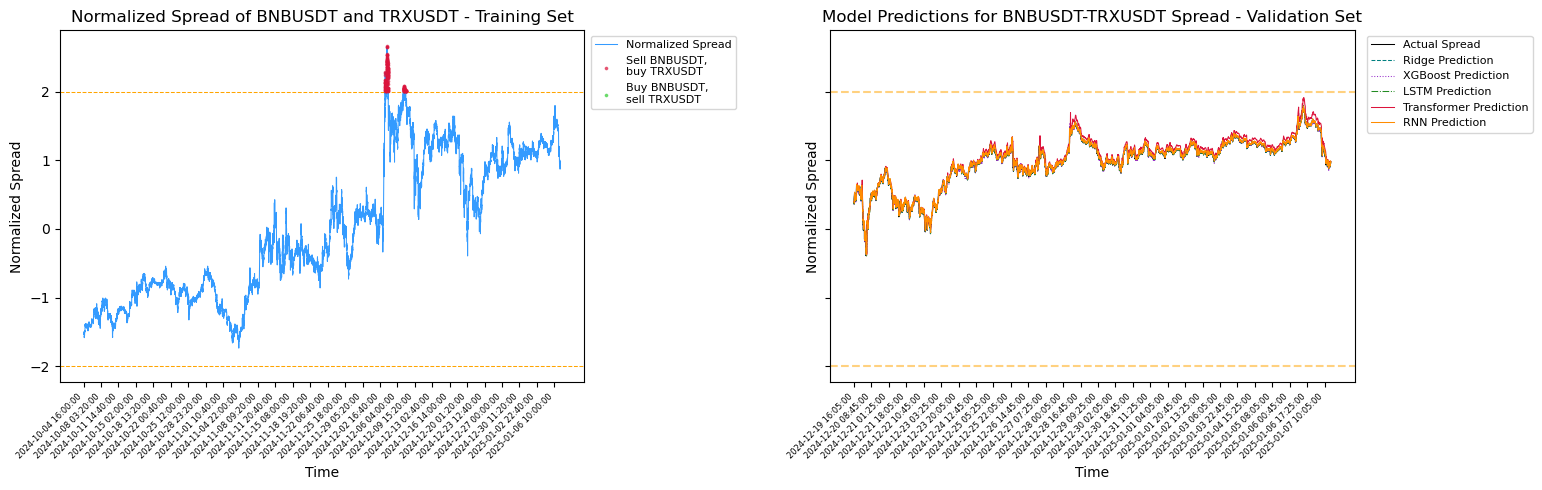

,BNBUSDT,XRPUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-04 16:00:00,556.3,0.5334,555.7666,-1.525508,No action
2024-10-04 16:05:00,556.5,0.5339,555.9661,-1.521942,No action
2024-10-04 16:10:00,556.0,0.5335,555.4665,-1.530874,No action
2024-10-04 16:15:00,555.9,0.5325,555.3675,-1.532644,No action
2024-10-04 16:20:00,555.5,0.5317,554.9683,-1.539780,No action


Ridge Regression MSE: 0.00040897641484479016
XGBoost MSE: 0.0005675285954408137
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
LSTM MSE: 0.0010275275766384727
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
RNN MSE: 0.0008322437951687309
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
Transformer MSE: 0.0029539754764250706


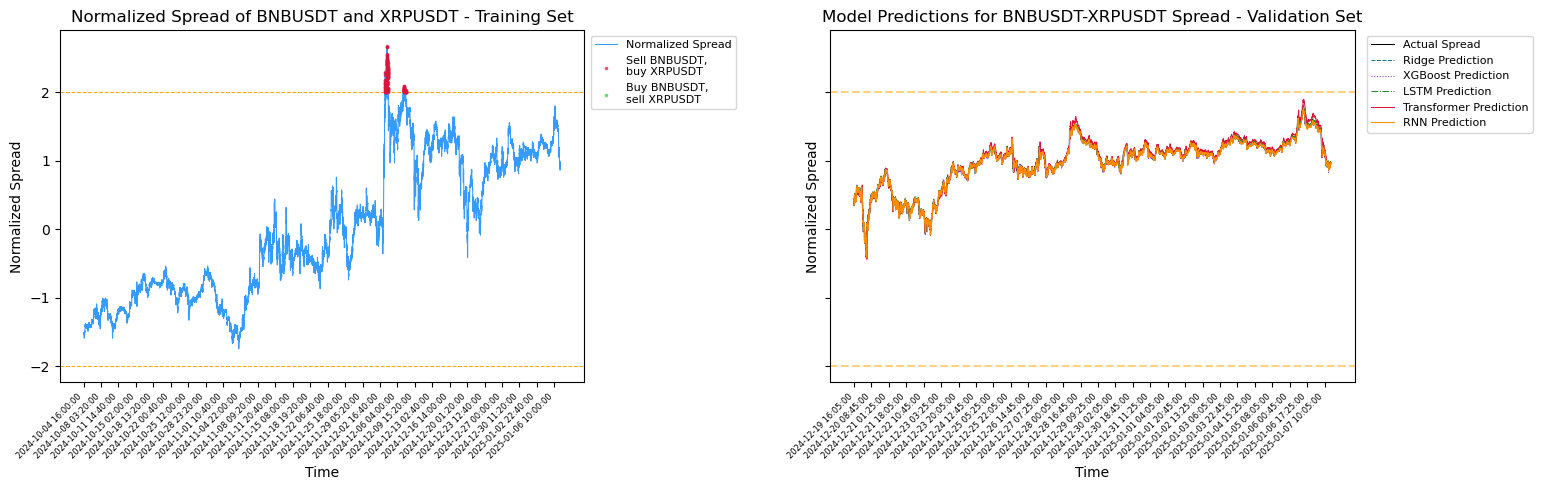

,TRXUSDT,XRPUSDT,Spread,NormalizedSpread,TradingSignal
OpenTime,,,,,
2024-10-04 16:00:00,0.1566,0.5334,-0.3768,1.028190,No action
2024-10-04 16:05:00,0.1566,0.5339,-0.3773,1.027548,No action
2024-10-04 16:10:00,0.1566,0.5335,-0.3769,1.028061,No action
2024-10-04 16:15:00,0.1564,0.5325,-0.3761,1.029087,No action
2024-10-04 16:20:00,0.1564,0.5317,-0.3753,1.030114,No action


Ridge Regression MSE: 7.169350425273182e-05
XGBoost MSE: 0.0003573542832560829
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
LSTM MSE: 0.0002352918798011845
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
RNN MSE: 0.0002317214088911099
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
Transformer MSE: 0.0008772965126116686


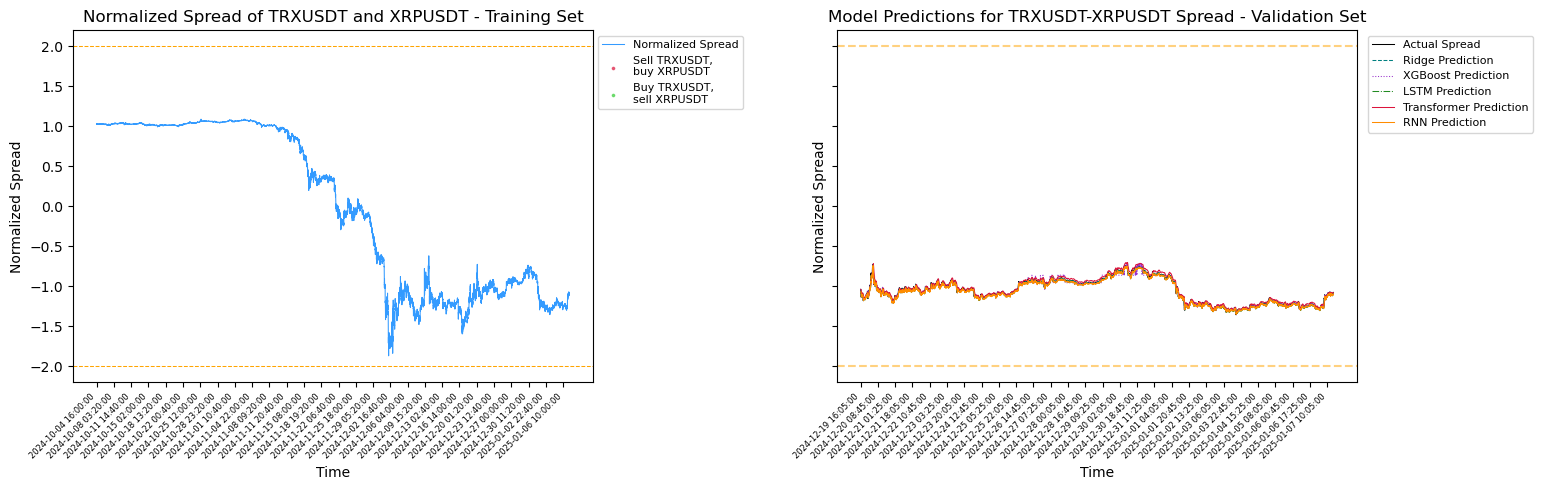

Pair,META DAXEX_ETF,SPY_ETF AVAXUSDT,SPY_ETF ETHUSDT,EQQQ_ETF BNBUSDT,BNBUSDT ADAUSDT,BNBUSDT ETHUSDT,BNBUSDT TRXUSDT,BNBUSDT XRPUSDT,TRXUSDT XRPUSDT
Ridge MSE,0.017827,0.024691,0.001524,0.002108,0.000404,0.000163,0.000402,0.000409,0.000072
Ridge Training Time,0.002652,0.002340,0.002119,0.001967,0.005352,0.002455,0.003261,0.003049,0.002893
Ridge Memory Usage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773438,0.000000,0.000000
XGB MSE,0.019349,0.035931,0.002602,0.003242,0.000553,0.000225,0.000553,0.000568,0.000357
XGB Training Time,0.056888,0.077026,0.050893,0.055152,0.121760,0.100081,0.123805,0.111604,0.140093
XGB Memory Usage,0.000000,0.191406,0.257812,0.773438,1.289062,0.000000,2.320312,0.000000,0.257812
LSTM MSE,0.043209,0.046701,0.003324,0.005529,0.000930,0.000370,0.000831,0.001028,0.000235
LSTM Training Time,20.580271,57.881696,57.344738,32.890926,252.420200,258.456272,268.037576,259.350369,283.901412
LSTM Memory Usage,20.589844,8.742188,19.054688,8.820312,15.691406,19.664062,14.800781,8.777344,-108.593750
RNN MSE,0.036742,0.045944,0.002975,0.005943,0.000822,0.000366,0.000905,0.000832,0.000232


In [11]:
untuned_performance = []
validation_dfs = pd.DataFrame()
s = 2.0

for p in pairs[0]:
    tickerX, tickerY = p.split(' ')
    spread_df = process_pairs_series(tickerX, tickerY, df=df_full)
    spread_df.loc[:, 'Spread'] = spread_df[tickerX] - spread_df[tickerY]
    # Normalize spread
    spread_df.loc[:, 'NormalizedSpread'] = ((spread_df['Spread'] - spread_df['Spread'].mean())
                                            / spread_df['Spread'].std())
    # Generate trading signals based on spreads
    spread_df.loc[:, 'TradingSignal'] = 'No action'
    spread_df.loc[spread_df['NormalizedSpread'] < -1*s, 'TradingSignal'] = f'Buy {tickerX}, sell {tickerY}'
    spread_df.loc[spread_df['NormalizedSpread'] > s, 'TradingSignal'] = f'Buy {tickerY}, sell {tickerX}'

    # Preview the data
    display(spread_df.head())

    model_df = spread_df[['NormalizedSpread']].copy()  # Added .copy() to avoid warnings
    # Create 5 lags
    # To be replaced with/extended by Technical Analysis features
    for lag in range(1, 6):
        model_df.loc[:, f'NormalizedSpread_Lag{lag}'] = model_df['NormalizedSpread'].shift(lag)
    model_df = model_df.dropna()

    # Models with default parameters
    ridge, ridge_mse, ridge_test_df, ridge_time, ridge_memory = models.ridge_regression(df=model_df, p=p)
    xgb, xgb_mse, xgb_test_df, xgb_time, xgb_memory = models.xgboost_regression(df=model_df, p=p)
    lstm, lstm_mse, lstm_test_df, lstm_time, lstm_memory = models.lstm_regression(df=model_df, p=p)
    rnn, rnn_mse, rnn_test_df, rnn_time, rnn_memory = models.rnn_regression(df=model_df, p=p)
    trf, trf_mse, trf_test_df, trf_time, trf_memory = models.transformer_regression(df=model_df, p=p)

    validation_dfs = pd.concat([validation_dfs,
                                ridge_test_df,
                                xgb_test_df,
                                lstm_test_df,
                                rnn_test_df,
                                trf_test_df,
                                ])

    untuned_performance.append({'Pair': p,
                                'Ridge MSE': ridge_mse,
                                'Ridge Training Time': ridge_time,
                                'Ridge Memory Usage': ridge_memory,
                                'XGB MSE': xgb_mse,
                                'XGB Training Time': xgb_time,
                                'XGB Memory Usage': xgb_memory,
                                'LSTM MSE': lstm_mse,
                                'LSTM Training Time': lstm_time,
                                'LSTM Memory Usage': lstm_memory,
                                'RNN MSE': rnn_mse,
                                'RNN Training Time': rnn_time,
                                'RNN Memory Usage': rnn_memory,
                                'Transformer MSE': trf_mse,
                                'Transformer Training Time': trf_time,
                                'Transformer Memory Usage': trf_memory,
                                })

    # Plot forecasts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
    plot_spread(spread_df, tickerX, tickerY, ax=ax1)
    models.plot_model_forecasts(ridge_test_df, xgb_test_df, lstm_test_df,
                                trf_test_df, rnn_test_df, tickerX, tickerY, ax=ax2)
    plt.show();
    # spread_df.to_csv(f'output/spread_{tickerX}_{tickerY}.csv')
    

untuned_performance_df = pd.DataFrame(untuned_performance).set_index('Pair').T
display(untuned_performance_df)

The above table shows the validation set metrics: MSE, time usage and memory usage.

In [ ]:
validation_dfs = validation_dfs.reset_index()
for model in validation_dfs['Model'].unique().tolist():
    model_df = validation_dfs[validation_dfs['Model']==model]
    performance = strategy.run_strategy(model_df)
    print(f'\n{model} Model Performance:')
    for metric, value in performance.items():
        if metric not in ['Portfolio Values', 'Daily Returns']:
            print(f'{metric}: {value:.4f}')
    log.info(f'Portfolio metrics for model {model} calculated correctly.')
    